# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

### Import relevant modules and data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import math

In [2]:
#Set seaborn style
sns.set()

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
#Separate out white-sounding names and black-sounding names into 2 samples
w = data[data.race == 'w']
b = data[data.race == 'b']

#### Calculate and visualize proportion of success (defined as receiving a call) for each group

In [8]:
#Sample proportion of white-sounding names and black-sounding names that received calls
p_w = w.call.sum()/len(w)
p_b = b.call.sum()/len(b)
p_total = data.call.sum()/len(data)
print('Success of white-sounding names:', '{:.2%}'.format(p_w))
print('Success of black-sounding names:', '{:.2%}'.format(p_b))
print('Overall success:', '{:.2%}'.format(p_total))

Success of white-sounding names: 9.65%
Success of black-sounding names: 6.45%
Overall success: 8.05%


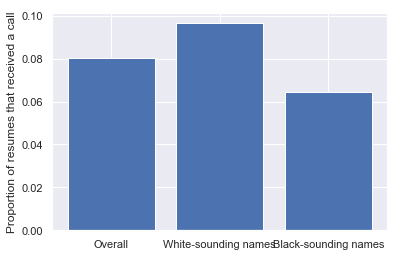

In [9]:
#Plot sample proportions
_ = plt.bar(['Overall', 'White-sounding names','Black-sounding names'],[p_total,p_w,p_b])
_ = plt.ylabel('Proportion of resumes that received a call')

### Since I am comparing success proportions for two samples, I will use a two-proportion z-test. The conditions are:
1) The two samples must be independently drawn and reasonably random or subjects were randomly assigned to two groups. (Check)

2) Normal condition: The number of successes and failures in each sample must be at least 10

3) Sample size should be <10% of the population. (Check)

In [10]:
#Number of failures and successes in each sample (0 is failure, 1 is success)
print('Success of white-sounding names:',w.call.sum())
print('Failure of white-sounding names:',len(w)-w.call.sum())
print('Success of black-sounding names:',b.call.sum())
print('Failure of black-sounding names:',len(b)-b.call.sum())

Success of white-sounding names: 235.0
Failure of white-sounding names: 2200.0
Success of black-sounding names: 157.0
Failure of black-sounding names: 2278.0


#### The normal condition is satistifed because each sample has more than 10 successes and failures.

### State null and alternate hypothesis

In [11]:
# Null: p_w = p_b 
# Alternate: p_w <> p_b
# where p_w is the sample proportion of success for white-sounding names and p_b is the sample proportion of success 
# for black-sounding names

#alpha = 0.05

### Frequentist approach using two proportions z-test

In [12]:
#Calculate sample size of each sample
n_white = len(w)
n_black = len(b)

#Difference in sample proportions
sample_diff = p_w - p_b

#Calculate critical z-value for 95% confidence
z_critical = stats.norm.ppf(.975)

#Calculate margin of error
sigma = math.sqrt(p_w*(1-p_w)/n_white + p_b*(1-p_b)/n_black)
margin_of_error = z_critical*sigma
print('Margin of error: %.3f' % margin_of_error)

Margin of error: 0.015


In [13]:
#Calculate confidence interval
confidence_interval = (sample_diff - margin_of_error, sample_diff + margin_of_error)
print('Confidence interval: ', confidence_interval)

Confidence interval:  (0.016777728181230755, 0.04728798023766041)


In [14]:
#Calculate p-value using z-test
n_w_success = w.call.sum()
n_b_success = b.call.sum()

stat, p = proportions_ztest(count=[n_w_success,n_b_success],nobs=[n_white,n_black],value=0)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=4.108, p=0.000
Reject null hypothesis


#### Since the p-value is less than 0.05, the null hypothesis is rejected. Therefore, the proportion of success for black and white-sounding names is not equal.

### Bootstrapping Approach

#### Calculate the pooled sample proportion. If the null hypothesis is true (i.e. the proportion of success is equal for both black-sounding and white-sounding names, we can assume that this ideal proportion should be equal to the pooled sample proportion.

In [15]:
#Test statistic is difference in proportions.

#Pooled sample proportion
pooled_p = data.call.sum()/len(data)
pooled_p

0.08049281314168377

#### What is the observed difference in sample proportions?

In [16]:
#Observed difference in proportion
sample_diff

0.032032854209445585

#### Recreate the sample data assuming p_hat = pooled_p = 0.08

In [17]:
#Recreate sample data assuming null hypothesis (proportions for both samples are equal to pooled p)
w_shifted = np.array([True]*int(pooled_p*len(w)) + [False]*(len(w)-int(pooled_p*len(w))))
b_shifted = np.array([True]*int(pooled_p*len(b)) + [False]*(len(w)-int(pooled_p*len(b))))

In [18]:
#Function to calculate difference in proportions
def proportion_difference(data1,data2):
    
    return data1.sum()/len(data1) - data2.sum()/len(data2)

In [19]:
#Function to calculate bootstrap replicate
def replicate(data1,data2,func):
    
    #Generate new samples
    bs_data1 = np.random.choice(data1,size=len(data1))
    bs_data2 = np.random.choice(data2,size=len(data2))
    
    return func(bs_data1,bs_data2)

In [20]:
#Function to generate many replicates
def draw_replicates(data1,data2,func,size):
    #Create empty array to store bootstrap replicates
    bs_replicates = np.empty(size)

    #Loop *size* times
    for i in range(size):
    
        #Calculate difference in proportion
        bs_replicates[i] = replicate(data1,data2,func)
    
    return bs_replicates

In [21]:
#Draw 10,000 replicates
bs_diff_prop = draw_replicates(w_shifted,b_shifted,proportion_difference,10000)

#### Visualize distrbution of replicates compared to the observed sample difference

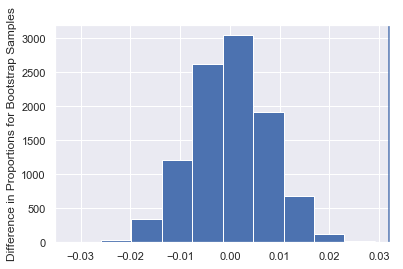

In [22]:
_ = plt.hist(bs_diff_prop)
_ = plt.axvline(sample_diff)
_ = plt.ylabel('Difference in Proportions for Bootstrap Samples')

In [23]:
#Calculate p-value to be the probability of getting something more extreme than what we observed assuming the 
#null is true. 0.032 is 0 - 0.032 = -0.032 units away from the null hypothesis. So our p-value is the probability of 
#being more than 0.0485 units away from 0.0805. This is P(Diff_of_Means <= -0.032) + P(Diff_of_Means >= 0.032).

#Calculate p-value
p = (abs(bs_diff_prop) >= abs(sample_diff)).sum()/len(bs_diff_prop)
print('p: ' + str(p))

#If p-value is less than alpha
if p<0.05:
    print("Reject null hypothesis: Proportions are not equal")
else:
    print("Fail to reject null hypothesis")

p: 0.0001
Reject null hypothesis: Proportions are not equal


#### Since the p-value calculated by both the frequentist approach and the bootstrapping approach is less than our significance level 0.05, the null hypothesis of the proportion of success being equal between black-sounding names and white-sounding names is rejected. 

### Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No, our analysis simply identified whether people with the same credentials observed statistically significant success for callbacks due to their race/name. It did not analyze which features were most highly correlated with callback success. In order to study that, we would want to look at the correlation between success and the different variables that could affect it (including race, education, years of experience etc.) to determine which features were the most important factor.